In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title):
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    return dataset, training_dataset

def get_ts_ids(dataset, ts_names):
    ts_ids = []
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name in ts_names:
            ts_ids.append(ts.id)
            
    return ts_ids

In [4]:
def rpca_detection_l(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    return robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [5]:
def histogram_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    return histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [6]:
def cluster_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    return cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [7]:
def svm_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    return svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [8]:
def isolation_forest_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    return isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [2]:
# Temp1 Multi - TS NUMBER
dataset_name = 'Idaweb Swiss Temperature Multi TS14'
ts_names = ['REH', 'KLO', 'SHA', 'NABZUE', 'SMA', 'WYN', 'WAE', 'SAG', 'SRS', 'THU', 'VAD', 'RUE', 'HAI', 'VLS']
dimensions = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [10]:
# TS NUMBER - RPCA
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
r_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = rpca_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    r_results.append(result)
    
rpca_results = np.array(r_results)  

In [11]:
# TS NUMBER - HISTOGRAM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
h_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = histogram_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    h_results.append(result)
    
histogram_results = np.array(h_results)

In [12]:
# TS NUMBER - CLUSTER
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
c_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = cluster_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    c_results.append(result)
    
cluster_results = np.array(c_results)  

In [13]:
# TS NUMBER - SVM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
s_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = svm_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    s_results.append(result)
    
svm_results = np.array(s_results)

In [14]:
# TS NUMBER - ISOLATION FOREST
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
i_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = isolation_forest_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    i_results.append(result)

isolation_results = np.array(i_results)

In [15]:
scores = [{ 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [16]:
print(scores)

[{'title': 'RPCA', 'scores': array([[0.607, 0.02 , 0.75 ],
       [0.59 , 0.021, 0.734],
       [0.798, 0.009, 0.901],
       [0.727, 0.013, 0.851],
       [0.59 , 0.021, 0.734],
       [0.504, 0.026, 0.649],
       [0.487, 0.027, 0.63 ],
       [0.487, 0.027, 0.63 ],
       [0.304, 0.037, 0.413],
       [0.284, 0.038, 0.387],
       [0.156, 0.044, 0.214]])}, {'title': 'Histogram', 'scores': array([[0.023, 0.12 , 0.178],
       [0.04 , 0.09 , 0.211],
       [0.045, 0.085, 0.22 ],
       [0.031, 0.093, 0.191],
       [0.025, 0.101, 0.179],
       [0.03 , 0.088, 0.185],
       [0.041, 0.064, 0.179],
       [0.038, 0.07 , 0.186],
       [0.038, 0.07 , 0.186],
       [0.025, 0.064, 0.135],
       [0.003, 0.056, 0.   ]])}, {'title': 'Cluster', 'scores': array([[0.641, 0.018, 0.78 ],
       [0.38 , 0.033, 0.507],
       [0.487, 0.027, 0.63 ],
       [0.284, 0.038, 0.387],
       [0.434, 0.03 , 0.571],
       [0.304, 0.037, 0.413],
       [0.361, 0.034, 0.485],
       [0.304, 0.037, 0.413],
 

In [3]:
import numpy as np
scores = [{'title': 'RPCA', 'scores': np.array([[0.607, 0.02 , 0.75 ],
       [0.59 , 0.021, 0.734],
       [0.798, 0.009, 0.901],
       [0.727, 0.013, 0.851],
       [0.59 , 0.021, 0.734],
       [0.504, 0.026, 0.649],
       [0.487, 0.027, 0.63 ],
       [0.487, 0.027, 0.63 ],
       [0.304, 0.037, 0.413],
       [0.284, 0.038, 0.387],
       [0.156, 0.044, 0.214]])}, {'title': 'Histogram', 'scores': np.array([[0.023, 0.12 , 0.178],
       [0.04 , 0.09 , 0.211],
       [0.045, 0.085, 0.22 ],
       [0.031, 0.093, 0.191],
       [0.025, 0.101, 0.179],
       [0.03 , 0.088, 0.185],
       [0.041, 0.064, 0.179],
       [0.038, 0.07 , 0.186],
       [0.038, 0.07 , 0.186],
       [0.025, 0.064, 0.135],
       [0.003, 0.056, 0.   ]])}, {'title': 'Cluster', 'scores': np.array([[0.641, 0.018, 0.78 ],
       [0.38 , 0.033, 0.507],
       [0.487, 0.027, 0.63 ],
       [0.284, 0.038, 0.387],
       [0.434, 0.03 , 0.571],
       [0.304, 0.037, 0.413],
       [0.361, 0.034, 0.485],
       [0.304, 0.037, 0.413],
       [0.487, 0.027, 0.63 ],
       [0.323, 0.036, 0.438],
       [0.357, 0.035, 0.598]])}, {'title': 'SVM', 'scores': np.array([[0.346, 0.035, 0.578],
       [0.331, 0.036, 0.561],
       [0.222, 0.041, 0.388],
       [0.22 , 0.046, 0.452],
       [0.184, 0.062, 0.436],
       [0.195, 0.059, 0.449],
       [0.184, 0.06 , 0.434],
       [0.176, 0.062, 0.426],
       [0.158, 0.068, 0.404],
       [0.152, 0.07 , 0.397],
       [0.084, 0.077, 0.294]])}, {'title': 'Isolation Forest', 'scores': np.array([[0.285, 0.069, 0.531],
       [0.155, 0.088, 0.397],
       [0.162, 0.096, 0.4  ],
       [0.17 , 0.104, 0.402],
       [0.024, 0.119, 0.179],
       [0.025, 0.124, 0.184],
       [0.047, 0.17 , 0.227],
       [0.04 , 0.159, 0.217],
       [0.093, 0.242, 0.258],
       [0.021, 0.142, 0.174],
       [0.012, 0.13 , 0.145]])}]

In [4]:
def generate_nmi_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,0], label=title)
    ax.set_ylabel('Score (NMI)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [5]:
def generate_rmse_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,1], label=title)
    ax.set_ylabel('Score (RMSE)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [6]:
def generate_f1_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,2], label=title)
    ax.set_ylabel('Score (F1)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

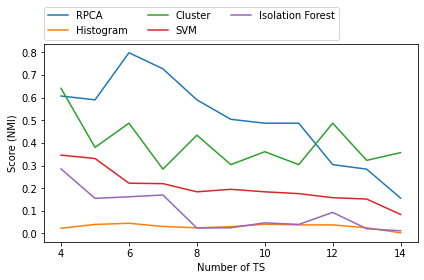

In [7]:
generate_nmi_line_chart(dimensions, scores)

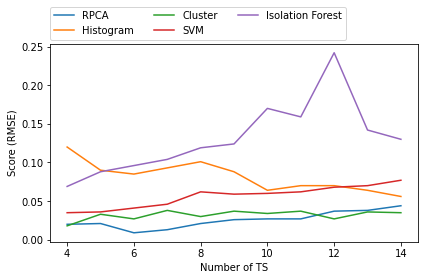

In [8]:
generate_rmse_line_chart(dimensions, scores)

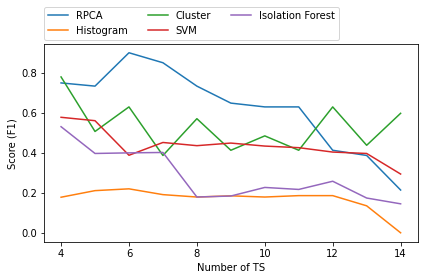

In [9]:
generate_f1_line_chart(dimensions, scores)